Read the documentation in https://www.physics.rutgers.edu/pythtb/

In [1]:
! pip install pythtb --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pythtb: filename=pythtb-1.8.0-py3-none-any.whl size=43585 sha256=33e29d5dfbb5b44d38ec6c43f990219ccaf8254b153f329d05aac7f6a6362e71
  Stored in directory: /cluster/home/jbachmann/.cache/pip/wheels/06/3e/01/156af7d5bb47c90840283775bdbfe33d4142f71b875c755b98
Successfully built pythtb


In [2]:
from IPython import display

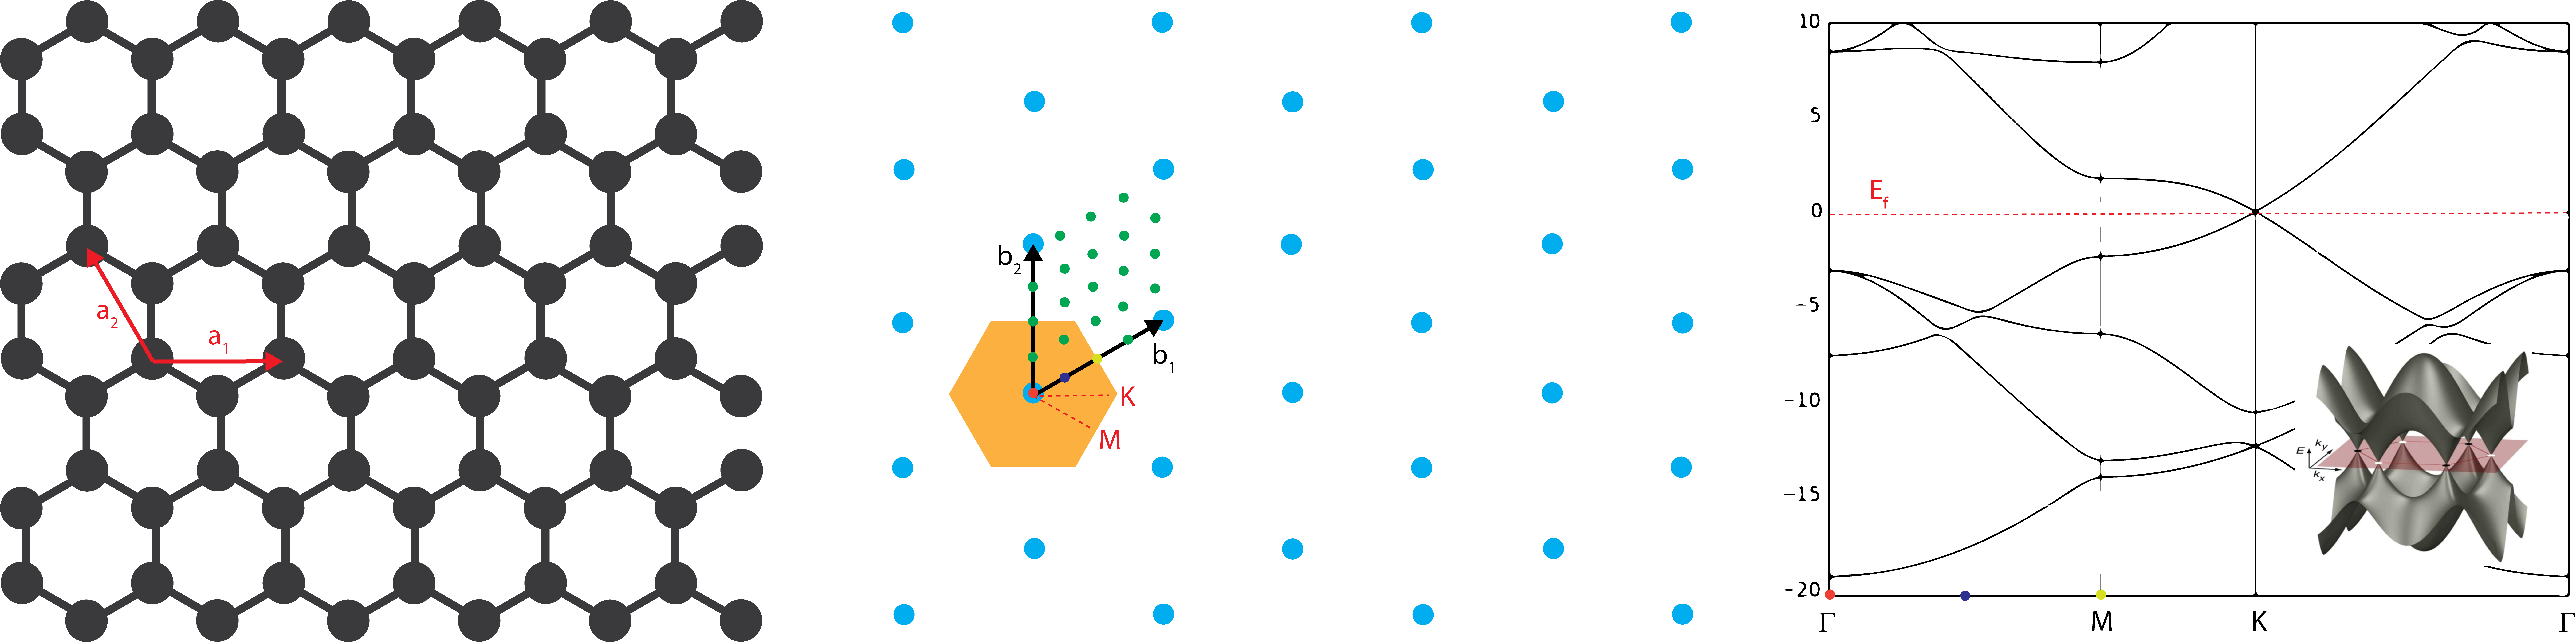

In [3]:
display.Image("./unit_cell.png")

In [4]:
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x_arr, x, fwhm):
    sigma = fwhm/2.355
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x_arr-x)/sigma)**2)

def calc_dos(evals, fwhm=0.1):
    e_arr = np.arange(-8.0, 8.0, 0.01)
    dos = np.zeros(len(e_arr))
    for e in evals.flatten():
        dos += gaussian(e_arr, e, fwhm)
    return e_arr, dos

# Graphene

In [5]:
# define lattice vectors
lat=[[1.0,0.0],[-0.5,np.sqrt(3.0)/2.0]]

# define coordinates of orbitals
orb=[[0,0],[1./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model=tb_model(2,2,lat,orb)

t=-2.8

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])
my_model.set_hop(t, 1, 0, [ 1, 1])

In [6]:
#tb_model?

In [7]:
# Solve for a uniform K-mesh

kmesh=my_model.k_uniform_mesh([200, 200])
evals_dos=my_model.solve_all(kmesh)

e_arr, dos = calc_dos(evals_dos)

In [8]:
# Solve for a specific K-path

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
# Gamma, M, K, Gamma
path=[[0.,0.],[.5,.0], [1./3.,1./3.],[0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$M$', r'$K$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

(k_vec,k_dist,k_node) = my_model.k_path(path,nk, report=False)

# solve the model on this mesh
evals_band=my_model.solve_all(k_vec)

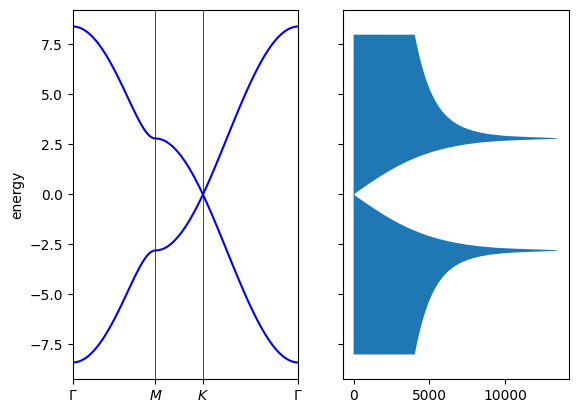

In [9]:
# PLOTTING

fig, axs = plt.subplots(1, 2, sharey=True)

# Plot bands
axs[0].set_xlim(k_node[0],k_node[-1])
axs[0].set_xticks(k_node)
axs[0].set_xticklabels(label)
for n in range(len(k_node)):
    axs[0].axvline(x=k_node[n],linewidth=0.5, color='k')
axs[0].set_ylabel("energy")
axs[0].plot(k_dist,evals_band[0], 'blue')
axs[0].plot(k_dist,evals_band[1], 'blue')

# Plot DOS

axs[1].fill_betweenx(e_arr, dos)

plt.show()

# Nanoribbon

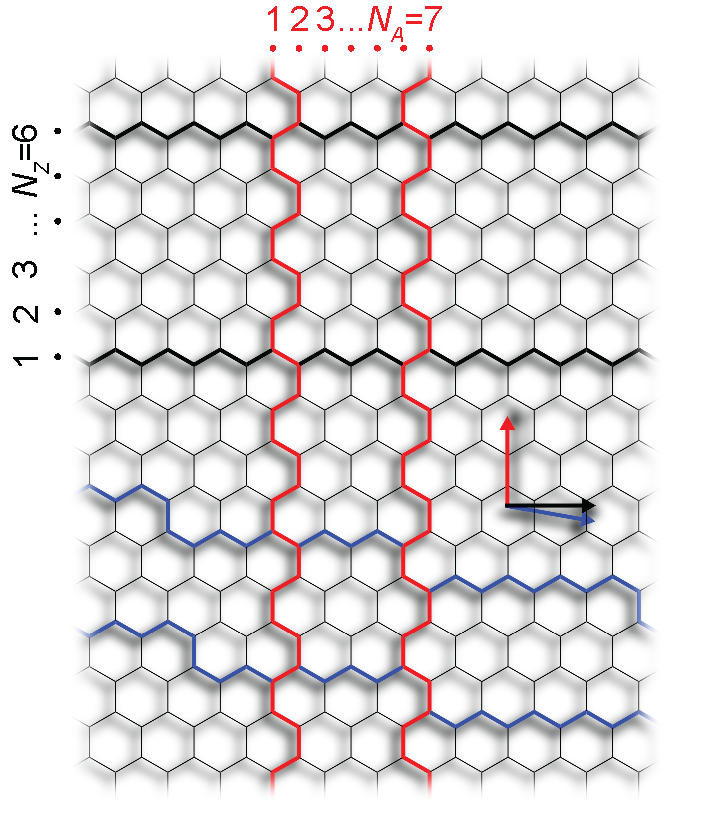

In [10]:
display.Image("./gnrs.png")

In [11]:
# define lattice vectors
#lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
lat=[[1.0,0.0],[-0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
#orb=[[1./3.,1./3.],[2./3.,2./3.]]
orb=[[0,0],[1./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model=tb_model(2,2,lat,orb)

t=-2.8

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])
my_model.set_hop(t, 1, 0, [ 1, 1])


In [12]:
#my_model.set_hop?

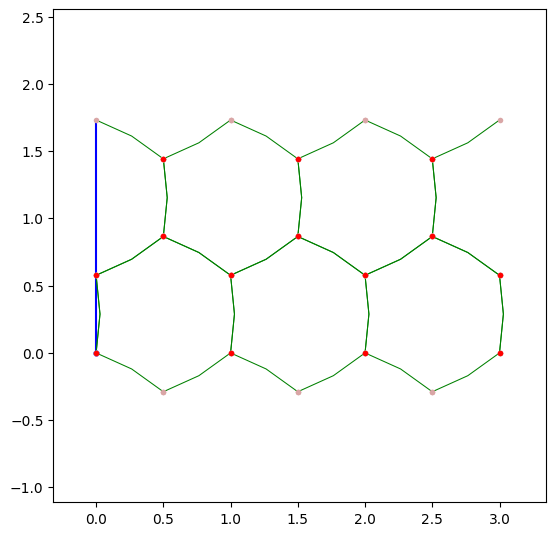

In [13]:
# make a graphene supercell
sc_model=my_model.make_supercell([[4,0],[1,2]])
# 4*a1 + 0*a2 , 1*a1 + 2*a2
#

# make a 1d cutout
one_dim_model=sc_model.cut_piece(1,0,glue_edgs=False)

# cut 2 extra orbitals to create the 7agnr
gnr_model = one_dim_model.remove_orb([14, 15])

# visualize slab unit cell
(fig,ax)=gnr_model.visualize(0,1)

In [14]:
#my_model.make_supercell?

In [15]:
#sc_model.cut_piece?

In [16]:
kmesh=gnr_model.k_uniform_mesh([100])
evals=gnr_model.solve_all(kmesh)

e_arr, dos = calc_dos(evals, 0.2)

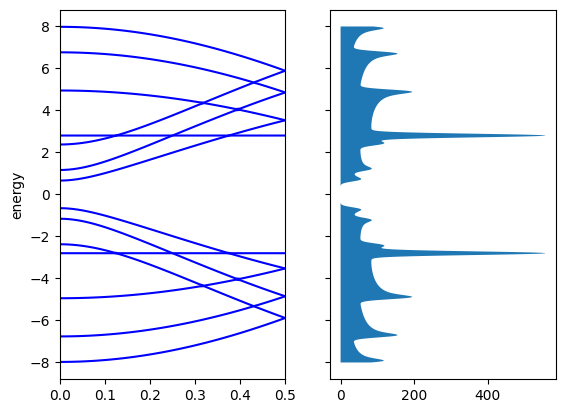

In [17]:

fig, axs = plt.subplots(1, 2, sharey=True)

# Plot bands
#axs[0].set_xlim(k_node[0],k_node[-1])
#axs[0].set_xticks(k_node)
#axs[0].set_xticklabels(label)

for i_band in range(len(evals)):
    axs[0].plot(kmesh, evals[i_band], 'b-')
    
axs[0].set_ylabel("energy")
axs[0].set_xlim([0, 0.5])

# Plot DOS

axs[1].fill_betweenx(e_arr, dos)

plt.show()

# Nanoflake

(<Figure size 640x640 with 1 Axes>, <AxesSubplot:>)

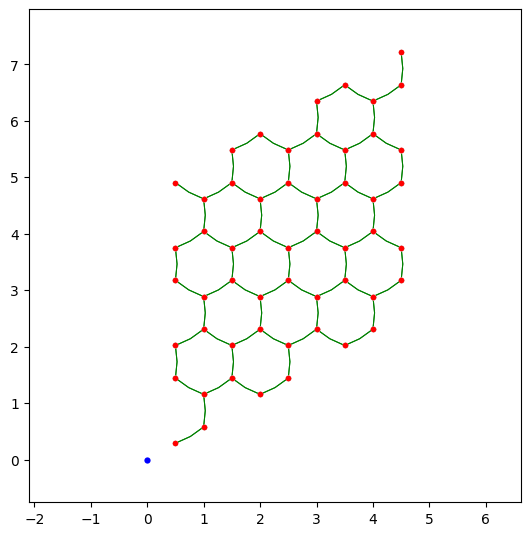

In [18]:

# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model=tb_model(2,2,lat,orb)

t=-2.8

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])

# make the supercell of the model
sc_model=my_model.make_supercell([[1,1],[-1,2]],to_home=True)

#sc_model.visualize(0, 1)

gnr_model=sc_model.cut_piece(3,1,glue_edgs=False)
flake_model=gnr_model.cut_piece(3,0,glue_edgs=False)

flake_model.visualize(0, 1)

In [19]:
evals=flake_model.solve_all()

In [20]:
e_arr = np.arange(-8.0, 8.0, 0.01)
dos = np.zeros(len(e_arr))

for e in evals:
    dos += gaussian(e_arr, e, 0.1)

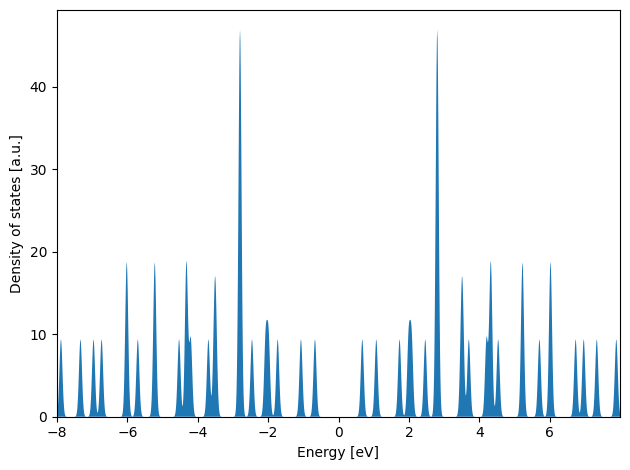

In [21]:
# now plot density of states
fig, ax = plt.subplots()
plt.fill_between(e_arr, dos, lw=2.0)
plt.xlim([np.min(e_arr), np.max(e_arr)])
plt.ylim([0, np.max(dos)*1.05])
ax.set_xlabel("Energy [eV]")
ax.set_ylabel("Density of states [a.u.]")
# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("flake.pdf")
#fig.savefig("flake.png", dpi=300)